# Titanic

In this example, we use the Titanic dataset to predict the survival of passengers on the Titanic. You can download the Jupyter Notebook of the study <a href="titanic.ipynb">here</a>.

## Initialization


In [5]:
from verticapy import *
from verticapy.connections import *
conn_info = {'host': '78.129.138.120',
             'port': '5433',
             'user': 'GAIVC',
             'password': 'GAIVC2021',
             'database': 'workshopdb'}

new_auto_connection(conn_info, name = 'workshop_db')
change_auto_connection('workshop_db')

Use the following command to allow Matplotlib to display graphics.

In [3]:
%matplotlib inline

Let's load the Titanic dataset.

pclass    survived                                      name       sex     age    sibsp   \\
1           1           0              Allison, Miss. Helen Loraine    female     2.0        1   \\
2           1           0  Allison, Mrs. Hudson J C (Bessie Wald...    female    25.0        1   \\
3           1           0                    Andrews, Mr. Thomas Jr      male    39.0        0   \\
4           1           0                      Beattie, Mr. Thomson      male    36.0        0   \\
5           1           0                   Brady, Mr. John Bertram      male    41.0        0   \\
6           1           0                        Brandeis, Mr. Emil      male    48.0        0   \\
7           1           0                 Brewe, Dr. Arthur Jackson      male    None        0   \\
8           1           0                  Carlsson, Mr. Frans Olof      male    33.0        0   \\
9           1           0                    Case, Mr. Howard Brown      male    49.0        0   \\
10          1           0             Cavendish, Mr. Tyrell William      male    36.0        1   \\
11          1           0     Chisholm, Mr. Roderick Robert Crispin      male    None        0   \\
12          1           0               Clifford, Mr. George Quincy      male    None        0   \\
13          1           0                Colley, Mr. Edward Pomeroy      male    47.0        0   \\
14          1           0              Crosby, Capt. Edward Gifford      male    70.0        1   \\
15          1           0                 Cumings, Mr. John Bradley      male    39.0        1   \\
16          1           0                        Farthing, Mr. John      male    None        0   \\
17          1           0            Fortune, Mr. Charles Alexander      male    19.0        3   \\
18          1           0                          Fry, Mr. Richard      male    None        0   \\
19          1           0                         Gee, Mr. Arthur H      male    47.0        0   \\
20          1           0                 Graham, Mr. George Edward      male    38.0        0   \\
21          1           0                Hays, Mr. Charles Melville      male    55.0        1   \\
22          1           0               Hipkins, Mr. William Edward      male    55.0        0   \\
23          1           0                Isham, Miss. Ann Elizabeth    female    50.0        0   \\
24          1           0                  Julian, Mr. Henry Forbes      male    50.0        0   \\
25          1           0                   Kent, Mr. Edward Austin      male    58.0        0   \\
26          1           0                Loring, Mr. Joseph Holland      male    30.0        0   \\
27          1           0                  Maguire, Mr. John Edward      male    30.0        0   \\
28          1           0                 Marvin, Mr. Daniel Warner      male    19.0        1   \\
29          1           0                 Millet, Mr. Francis Davis      male    65.0        0   \\
30          1           0               Minahan, Dr. William Edward      male    44.0        2   \\
31          1           0             Parr, Mr. William Henry Marsh      male    None        0   \\
32          1           0  Penasco y Castellana, Mr. Victor de S...      male    18.0        1   \\
33          1           0                     Rood, Mr. Hugh Roscoe      male    None        0   \\
34          1           0                    Rothschild, Mr. Martin      male    55.0        1   \\
35          1           0                Ryerson, Mr. Arthur Larned      male    61.0        1   \\
36          1           0                Smith, Mr. Richard William      male    None        0   \\
37          1           0                        Straus, Mr. Isidor      male    67.0        1   \\
38          1           0                         Taussig, Mr. Emil      male    52.0        1   \\
39          1           0                 Van der hoef, Mr. Wyckoff      male    61.0        0   \\
40     
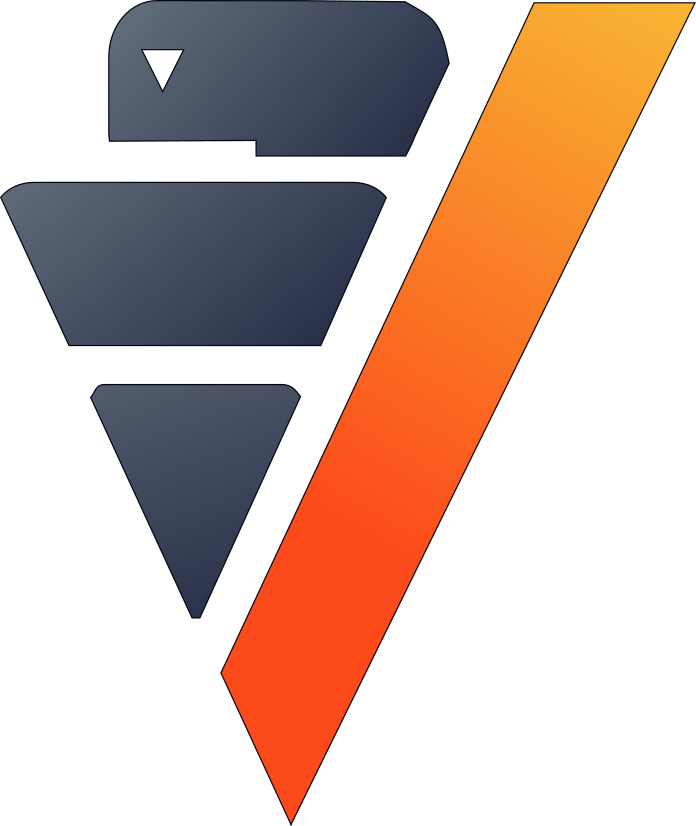

In [38]:
from verticapy.datasets import load_titanic
from verticapy import *
titanic = load_titanic()
display(titanic)

In [7]:
titanic = vDataFrame('titanic')
titanic

## Data Exploration and Preparation

Let's explore the data by displaying descriptive statistics of all the columns.

dtype    unique    count                     top   \\
"pclass"                   int         3     1234                       3   \\
"survived"                 int         2     1234                       0   \\
"name"            varchar(164)      1232     1234    Connolly, Miss. Kate   \\
"sex"              varchar(20)         2     1234                    male   \\
"age"             numeric(6,3)        96      997                    None   \\
"sibsp"                    int         7     1234                       0   \\
"parch"                    int         8     1234                       0   \\
"ticket"           varchar(36)       887     1234                CA. 2343   \\
"fare"           numeric(10,5)       277     1233                    8.05   \\
"cabin"            varchar(30)       182      286                    None   \\
"embarked"         varchar(20)         3     1232                       S   \\
"boat"            varchar(100)        26      439                    None   \\
"body"                     int       118      118                    None   \\
"home.dest"       varchar(100)       359      706                    None   \\
                 top_percent  
"pclass"              53.728  
"survived"            63.533  
"name"                 0.162  
"sex"                 65.964  
"age"                 19.206  
"sibsp"               67.747  
"parch"               76.904  
"ticket"                0.81  
"fare"                   4.7  
"cabin"               76.823  
"embarked"            70.746  
"boat"                64.425  
"body"                90.438  
"home.dest"           42.788  
Rows: 1-14 | Columns: 6
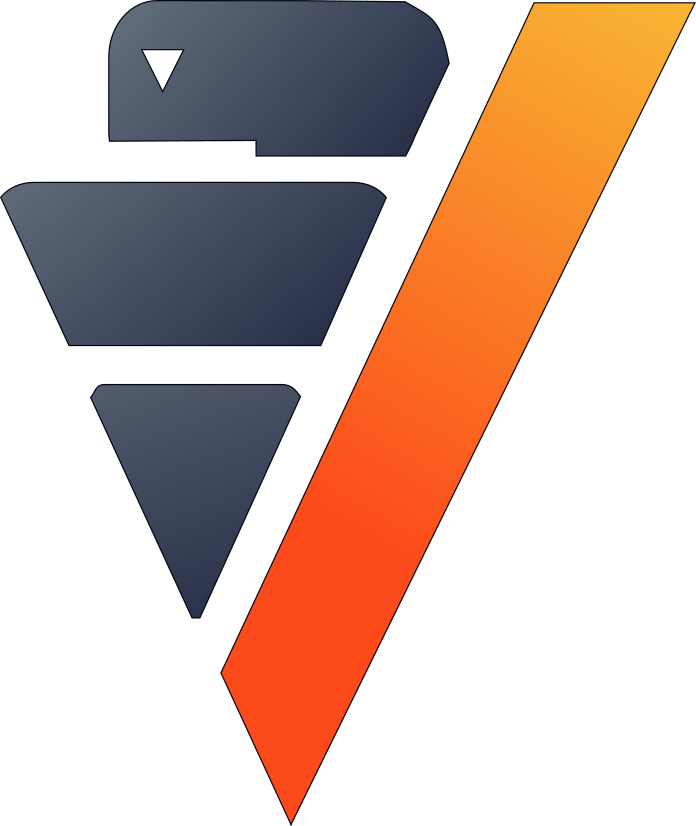

In [8]:
titanic.describe(method = "categorical")

The columns "body" (passenger ID), "home.dest" (passenger origin/destination), "embarked" (origin port) and "ticket" (ticket ID) shouldn't influence survival, so we can ignore these.

Let's focus our analysis on the columns "name" and "cabin." We'll begin with the passgeners' names.

c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\toolbox.py:593: Warning: The VerticaPy schema doesn't exist or is incomplete. The model can not be stored.
Please use create_verticapy_schema function to set up the schema and the drop function to drop it if it is corrupted.
  warnings.warn(warning_message, Warning)


token                      df    cnt    rnk  
1              mr     0.14816310052482842    734      1  
2            miss    0.046023415421881306    228      2  
3             mrs     0.03734356075898264    185      3  
4         william    0.016148566814695196     80      4  
5            john    0.013726281792490917     68      5  
6          master    0.011303996770286637     56      6  
7           henry    0.008881711748082359     44      7  
8           james    0.007468712151796528     37      8  
9         charles    0.007468712151796528     37      8  
10         thomas    0.006863140896245458     34     10  
11         joseph    0.006257569640694388     31     11  
12         george    0.006257569640694388     31     11  
13         edward    0.005450141299959629     27     13  
14           mary    0.005248284214775939     26     14  
15          johan    0.004440855874041179     22     15  
16      elizabeth    0.004440855874041179     22     15  
17      frederick    0.004037141703673799     20     17  
18         samuel    0.003835284618490109     19     18  
19         robert    0.003633427533306419     18     19  
20      alexander    0.003633427533306419     18     19  
21         arthur    0.003431570448122729     17     21  
22         alfred    0.003431570448122729     17     21  
23        richard    0.003229713362939039     16     23  
24          maria    0.003229713362939039     16     23  
25           anna    0.003229713362939039     16     23  
26           karl    0.002825999192571659     14     26  
27             jr    0.002825999192571659     14     26  
28         albert    0.002825999192571659     14     26  
29          peter    0.002624142107387969     13     29  
30              j    0.002624142107387969     13     29  
31        patrick    0.002422285022204279     12     31  
32          frank    0.002422285022204279     12     31  
33         ernest    0.002422285022204279     12     31  
34          alice    0.002422285022204279     12     31  
35       margaret    0.002220427937020589     11     35  
36              h    0.002220427937020589     11     35  
37      andersson    0.002220427937020589     11     35  
38         walter    0.002018570851836899     10     38  
39           sage    0.002018570851836899     10     38  
40         martin    0.002018570851836899     10     38  
41        leonard    0.002018570851836899     10     38  
42          edith     0.00181671376665321      9     42  
43              e     0.00181671376665321      9     42  
44              y     0.00161485668146952      8     44  
45         victor     0.00161485668146952      8     44  
46            van     0.00161485668146952      8     44  
47            rev     0.00161485668146952      8     44  
48          harry     0.00161485668146952      8     44  
49        goodwin     0.00161485668146952      8     44  
50        francis     0.00161485668146952      8     44  
51          elias     0.00161485668146952      8     44  
52             dr     0.00161485668146952      8     44  
53          david     0.00161485668146952      8     44  
54         daniel     0.00161485668146952      8     44  
55        asplund     0.00161485668146952      8     44  
56          annie     0.00161485668146952      8     44  
57           nils     0.00141299959628583      7     57  
58          marie     0.00141299959628583      7     57  
59         louise     0.00141299959628583      7     57  
60              l     0.00141299959628583      7     57  
61          helen     0.00141299959628583      7     57  
62          ernst     0.00141299959628583      7     57  
63           emil     0.00141299959628583      7     57  
64             de     0.00141299959628583      7     57  
65         davies     0.00141299959628583      7     57  
66           carl     0.00141299959628583      7     57  
67          brown     0.00141299959628583      7     57  
68        bertram     0.00141299959628583      7     57  
69        
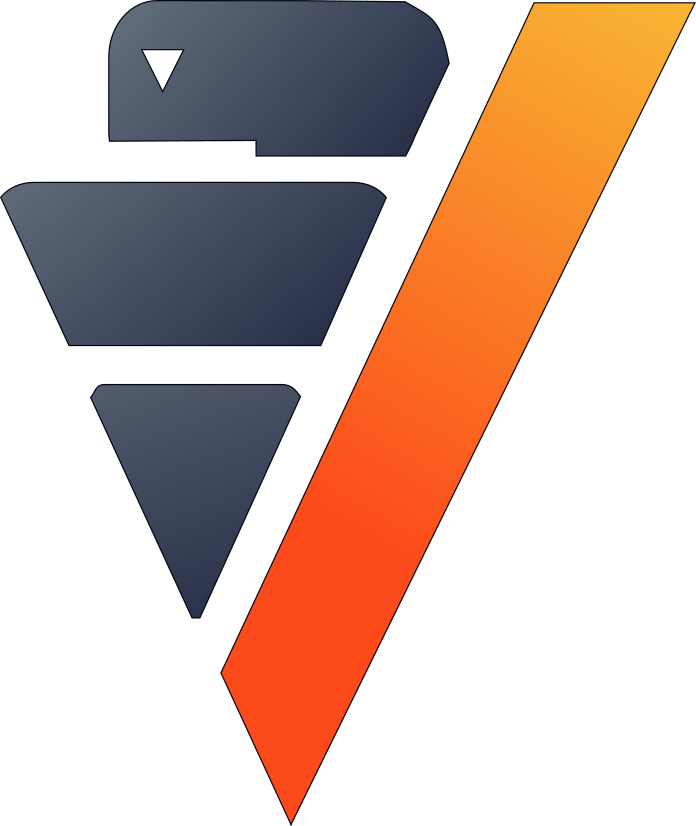

In [9]:
from verticapy.learn.preprocessing import CountVectorizer
model = CountVectorizer("name_voc2")
model.drop()
model.fit(titanic, ["Name"]).transform()

We can extract each passenger's title through their name, which might come in handy.

Let's move on to the cabins.

c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\toolbox.py:593: Warning: The VerticaPy schema doesn't exist or is incomplete. The model can not be stored.
Please use create_verticapy_schema function to set up the schema and the drop function to drop it if it is corrupted.
  warnings.warn(warning_message, Warning)


token                      df    cnt    rnk  
1       None      0.7337461300309598    948      1  
2          f    0.006191950464396285      8      2  
3        c27    0.004643962848297214      6      3  
4        c25    0.004643962848297214      6      3  
5        c23    0.004643962848297214      6      3  
6         g6    0.003869969040247678      5      6  
7         f4    0.003095975232198142      4      7  
8          d    0.003095975232198142      4      7  
9        c78    0.003095975232198142      4      7  
10       c26    0.003095975232198142      4      7  
11       c22    0.003095975232198142      4      7  
12       b98    0.003095975232198142      4      7  
13       b96    0.003095975232198142      4      7  
14       b66    0.003095975232198142      4      7  
15       b63    0.003095975232198142      4      7  
16       b59    0.003095975232198142      4      7  
17       b57    0.003095975232198142      4      7  
18       f33    0.002321981424148607      3     18  
19        f2    0.002321981424148607      3     18  
20       e46    0.002321981424148607      3     18  
21       e34    0.002321981424148607      3     18  
22      c101    0.002321981424148607      3     18  
23       b60    0.002321981424148607      3     18  
24       b58    0.002321981424148607      3     18  
25       b55    0.002321981424148607      3     18  
26       b53    0.002321981424148607      3     18  
27       b51    0.002321981424148607      3     18  
28       a34    0.002321981424148607      3     18  
29       g73    0.001547987616099071      2     29  
30       g63    0.001547987616099071      2     29  
31        e8    0.001547987616099071      2     29  
32       e67    0.001547987616099071      2     29  
33       e50    0.001547987616099071      2     29  
34       e44    0.001547987616099071      2     29  
35       e33    0.001547987616099071      2     29  
36       e31    0.001547987616099071      2     29  
37       e24    0.001547987616099071      2     29  
38      e121    0.001547987616099071      2     29  
39      e101    0.001547987616099071      2     29  
40       d37    0.001547987616099071      2     29  
41       d36    0.001547987616099071      2     29  
42       d35    0.001547987616099071      2     29  
43       d33    0.001547987616099071      2     29  
44       d30    0.001547987616099071      2     29  
45       d28    0.001547987616099071      2     29  
46       d26    0.001547987616099071      2     29  
47       d21    0.001547987616099071      2     29  
48       d20    0.001547987616099071      2     29  
49       d19    0.001547987616099071      2     29  
50       d17    0.001547987616099071      2     29  
51       d15    0.001547987616099071      2     29  
52       d12    0.001547987616099071      2     29  
53       d10    0.001547987616099071      2     29  
54       c93    0.001547987616099071      2     29  
55       c92    0.001547987616099071      2     29  
56       c89    0.001547987616099071      2     29  
57       c86    0.001547987616099071      2     29  
58       c85    0.001547987616099071      2     29  
59       c83    0.001547987616099071      2     29  
60       c80    0.001547987616099071      2     29  
61        c7    0.001547987616099071      2     29  
62       c68    0.001547987616099071      2     29  
63       c65    0.001547987616099071      2     29  
64       c64    0.001547987616099071      2     29  
65       c62    0.001547987616099071      2     29  
66        c6    0.001547987616099071      2     29  
67       c57    0.001547987616099071      2     29  
68       c55    0.001547987616099071      2     29  
69       c54    0.001547987616099071      2     29  
70       c52    0.001547987616099071      2     29  
71       c46    0.001547987616099071      2     29  
72       c32    0.001547987616099071      2     29  
73       c31    0.001547987616099071      2     29  
74        c2    0.001547987616099071      2     29  
75      c126    0.00154798761609
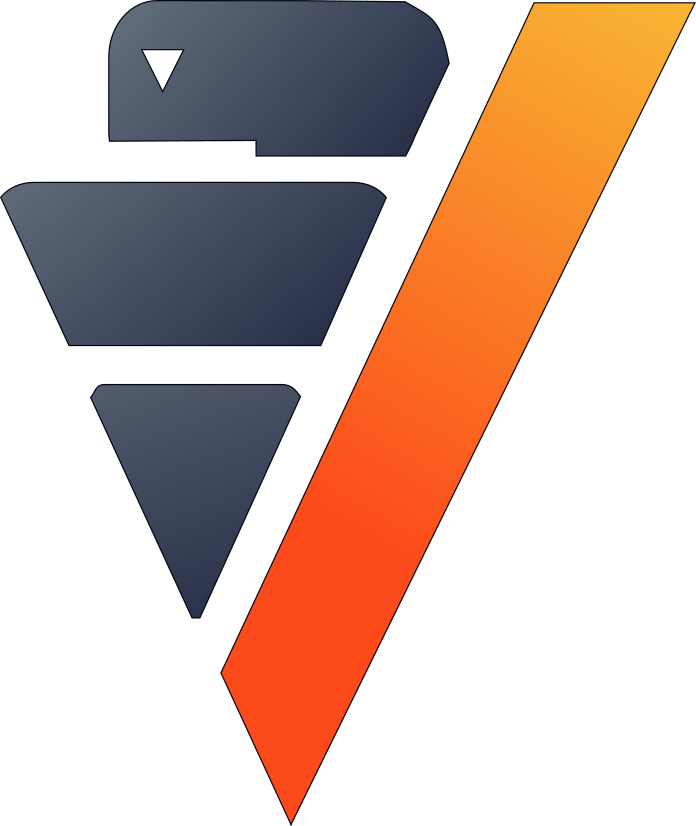

In [10]:
from verticapy.learn.preprocessing import CountVectorizer
model = CountVectorizer("cabin_voc4")
model.drop()
model.fit("titanic", ["cabin"]).transform()

Here, we have the cabin IDs, the letter of which represents a certain position on the boat. Let's look at the number of occurences.

c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\toolbox.py:593: Warning: The VerticaPy schema doesn't exist or is incomplete. The model can not be stored.
Please use create_verticapy_schema function to set up the schema and the drop function to drop it if it is corrupted.
  warnings.warn(warning_message, Warning)


token    SUM  
1         b     92  
2         e     43  
3         d     47  
4         t      1  
5         a     20  
6         c    113  
7         g      9  
8         f     19  
9      None    948  
Rows: 1-9 | Columns: 2
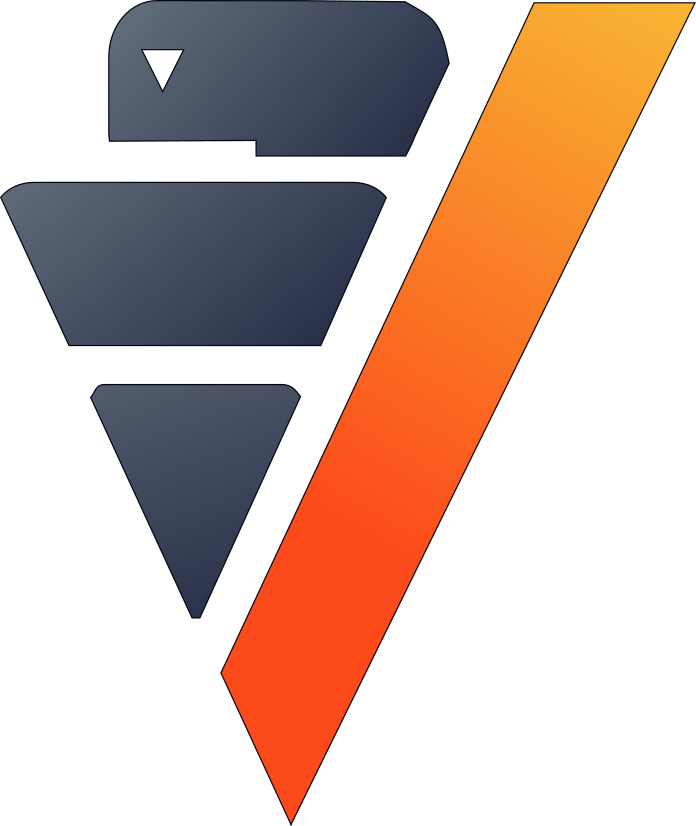

In [11]:
CountVectorizer("cabin_voc5").fit("titanic", ["cabin"]).transform(
                )["token"].str_slice(1, 1).groupby(
                columns = ["token"], expr = ["SUM(cnt)"]).head(30)

NULL values for "cabin" might represent passengers without a cabin. If this is the case, then these are missing values not at random (MNAR).

NULL values for "boat" represent passengers who have a dedicated "lifeboat." We can drop the useless columns and encode the others.

pclass    survived                                      name   \\
1           1           0              Allison, Miss. Helen Loraine   \\
2           1           0      Allison, Mr. Hudson Joshua Creighton   \\
3           1           0  Allison, Mrs. Hudson J C (Bessie Wald...   \\
4           1           0                    Andrews, Mr. Thomas Jr   \\
5           1           0                   Artagaveytia, Mr. Ramon   \\
6           1           0                    Astor, Col. John Jacob   \\
7           1           0                       Baumann, Mr. John D   \\
8           1           0                  Baxter, Mr. Quigg Edmond   \\
9           1           0                      Beattie, Mr. Thomson   \\
10          1           0                       Birnbaum, Mr. Jakob   \\
11          1           0              Blackwell, Mr. Stephen Weart   \\
12          1           0                  Borebank, Mr. John James   \\
13          1           0                   Brady, Mr. John Bertram   \\
14          1           0                        Brandeis, Mr. Emil   \\
15          1           0                 Brewe, Dr. Arthur Jackson   \\
16          1           0         Butt, Major. Archibald Willingham   \\
17          1           0                     Cairns, Mr. Alexander   \\
18          1           0                  Carlsson, Mr. Frans Olof   \\
19          1           0                   Carrau, Mr. Francisco M   \\
20          1           0                    Carrau, Mr. Jose Pedro   \\
21          1           0                    Case, Mr. Howard Brown   \\
22          1           0             Cavendish, Mr. Tyrell William   \\
23          1           0               Chaffee, Mr. Herbert Fuller   \\
24          1           0     Chisholm, Mr. Roderick Robert Crispin   \\
25          1           0                  Clark, Mr. Walter Miller   \\
26          1           0               Clifford, Mr. George Quincy   \\
27          1           0                Colley, Mr. Edward Pomeroy   \\
28          1           0          Compton, Mr. Alexander Taylor Jr   \\
29          1           0                 Crafton, Mr. John Bertram   \\
30          1           0              Crosby, Capt. Edward Gifford   \\
31          1           0                 Cumings, Mr. John Bradley   \\
32          1           0                    Davidson, Mr. Thornton   \\
33          1           0                Douglas, Mr. Walter Donald   \\
34          1           0              Dulles, Mr. William Crothers   \\
35          1           0                  Evans, Miss. Edith Corse   \\
36          1           0                        Farthing, Mr. John   \\
37          1           0           Foreman, Mr. Benjamin Laventall   \\
38          1           0            Fortune, Mr. Charles Alexander   \\
39          1           0                         Fortune, Mr. Mark   \\
40          1           0               Franklin, Mr. Thomas Parham   \\
41          1           0                          Fry, Mr. Richard   \\
42          1           0               Futrelle, Mr. Jacques Heath   \\
43          1           0                         Gee, Mr. Arthur H   \\
44          1           0                        Giglio, Mr. Victor   \\
45          1           0                 Goldschmidt, Mr. George B   \\
46          1           0                 Graham, Mr. George Edward   \\
47          1           0                  Guggenheim, Mr. Benjamin   \\
48          1           0                 Harrington, Mr. Charles H   \\
49          1           0               Harris, Mr. Henry Birkhardt   \\
50          1           0                     Harrison, Mr. William   \\
51          1           0                Hays, Mr. Charles Melville   \\
52          1           0                     Head, Mr. Christopher   \\
53          1           0               Hilliard, Mr. Herbert Henry   \\
54          1           0               Hipkins, Mr. William Edwa
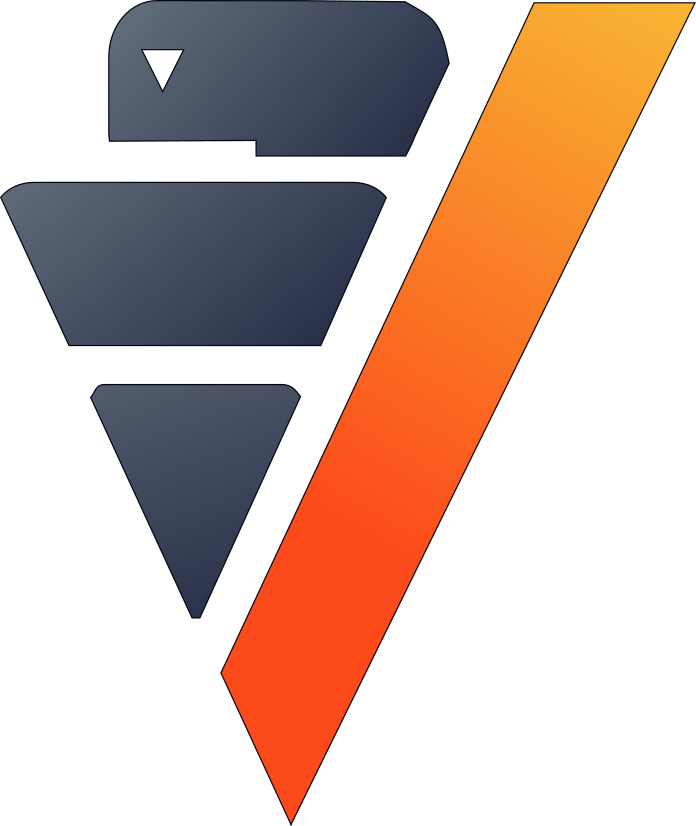

In [12]:
titanic.drop(["body", "home.dest", "embarked", "ticket"])

795 elements were filled.
948 elements were filled.


pclass    survived          name       sex     age   \\
1           1           0         Miss.    female     2.0   \\
2           1           0           Mr.      male    30.0   \\
3           1           0          Mrs.    female    25.0   \\
4           1           0           Mr.      male    39.0   \\
5           1           0           Mr.      male    71.0   \\
6           1           0          Col.      male    47.0   \\
7           1           0           Mr.      male    None   \\
8           1           0           Mr.      male    24.0   \\
9           1           0           Mr.      male    36.0   \\
10          1           0           Mr.      male    25.0   \\
11          1           0           Mr.      male    45.0   \\
12          1           0           Mr.      male    42.0   \\
13          1           0           Mr.      male    41.0   \\
14          1           0           Mr.      male    48.0   \\
15          1           0           Dr.      male    None   \\
16          1           0        Major.      male    45.0   \\
17          1           0           Mr.      male    None   \\
18          1           0           Mr.      male    33.0   \\
19          1           0           Mr.      male    28.0   \\
20          1           0           Mr.      male    17.0   \\
21          1           0           Mr.      male    49.0   \\
22          1           0           Mr.      male    36.0   \\
23          1           0           Mr.      male    46.0   \\
24          1           0           Mr.      male    None   \\
25          1           0           Mr.      male    27.0   \\
26          1           0           Mr.      male    None   \\
27          1           0           Mr.      male    47.0   \\
28          1           0           Mr.      male    37.0   \\
29          1           0           Mr.      male    None   \\
30          1           0         Capt.      male    70.0   \\
31          1           0           Mr.      male    39.0   \\
32          1           0           Mr.      male    31.0   \\
33          1           0           Mr.      male    50.0   \\
34          1           0           Mr.      male    39.0   \\
35          1           0         Miss.    female    36.0   \\
36          1           0           Mr.      male    None   \\
37          1           0           Mr.      male    30.0   \\
38          1           0           Mr.      male    19.0   \\
39          1           0           Mr.      male    64.0   \\
40          1           0           Mr.      male    None   \\
41          1           0           Mr.      male    None   \\
42          1           0           Mr.      male    37.0   \\
43          1           0           Mr.      male    47.0   \\
44          1           0           Mr.      male    24.0   \\
45          1           0           Mr.      male    71.0   \\
46          1           0           Mr.      male    38.0   \\
47          1           0           Mr.      male    46.0   \\
48          1           0           Mr.      male    None   \\
49          1           0           Mr.      male    45.0   \\
50          1           0           Mr.      male    40.0   \\
51          1           0           Mr.      male    55.0   \\
52          1           0           Mr.      male    42.0   \\
53          1           0           Mr.      male    None   \\
54          1           0           Mr.      male    55.0   \\
55          1           0           Mr.      male    42.0   \\
56          1           0           Mr.      male    None   \\
57          1           0         Miss.    female    50.0   \\
58          1           0           Mr.      male    46.0   \\
59          1           0           Mr.      male    50.0   \\
60          1           0           Mr.      male    32.5   \\
61          1           0           Mr.      male    58.0   \\
62          1           0           Mr.      male    41.0   \\
63          1           0           Mr
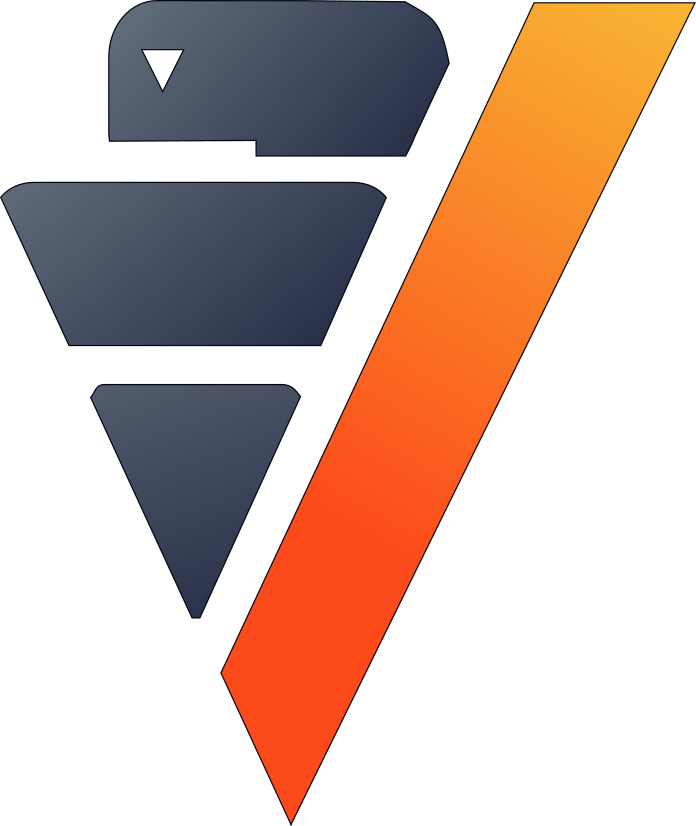

In [13]:
titanic["cabin"].str_slice(1, 1)["name"].str_extract(
        ' ([A-Za-z]+)\.')["boat"].fillna(
        method = "0ifnull")["cabin"].fillna("No Cabin")

Our assumption about the meaning of a NULL value of "cabin" turned out to be incorrect; after all, first class passengers should have a cabin. This means that the "cabin" column has far too many missing values at random (MAR). We'll have to drop it.

pclass    survived          name       sex     age   \\
1           1           0         Miss.    female     2.0   \\
2           1           0           Mr.      male    30.0   \\
3           1           0          Mrs.    female    25.0   \\
4           1           0           Mr.      male    39.0   \\
5           1           0           Mr.      male    71.0   \\
6           1           0          Col.      male    47.0   \\
7           1           0           Mr.      male    None   \\
8           1           0           Mr.      male    24.0   \\
9           1           0           Mr.      male    36.0   \\
10          1           0           Mr.      male    25.0   \\
11          1           0           Mr.      male    45.0   \\
12          1           0           Mr.      male    42.0   \\
13          1           0           Mr.      male    41.0   \\
14          1           0           Mr.      male    48.0   \\
15          1           0           Dr.      male    None   \\
16          1           0        Major.      male    45.0   \\
17          1           0           Mr.      male    None   \\
18          1           0           Mr.      male    33.0   \\
19          1           0           Mr.      male    28.0   \\
20          1           0           Mr.      male    17.0   \\
21          1           0           Mr.      male    49.0   \\
22          1           0           Mr.      male    36.0   \\
23          1           0           Mr.      male    46.0   \\
24          1           0           Mr.      male    None   \\
25          1           0           Mr.      male    27.0   \\
26          1           0           Mr.      male    None   \\
27          1           0           Mr.      male    47.0   \\
28          1           0           Mr.      male    37.0   \\
29          1           0           Mr.      male    None   \\
30          1           0         Capt.      male    70.0   \\
31          1           0           Mr.      male    39.0   \\
32          1           0           Mr.      male    31.0   \\
33          1           0           Mr.      male    50.0   \\
34          1           0           Mr.      male    39.0   \\
35          1           0         Miss.    female    36.0   \\
36          1           0           Mr.      male    None   \\
37          1           0           Mr.      male    30.0   \\
38          1           0           Mr.      male    19.0   \\
39          1           0           Mr.      male    64.0   \\
40          1           0           Mr.      male    None   \\
41          1           0           Mr.      male    None   \\
42          1           0           Mr.      male    37.0   \\
43          1           0           Mr.      male    47.0   \\
44          1           0           Mr.      male    24.0   \\
45          1           0           Mr.      male    71.0   \\
46          1           0           Mr.      male    38.0   \\
47          1           0           Mr.      male    46.0   \\
48          1           0           Mr.      male    None   \\
49          1           0           Mr.      male    45.0   \\
50          1           0           Mr.      male    40.0   \\
51          1           0           Mr.      male    55.0   \\
52          1           0           Mr.      male    42.0   \\
53          1           0           Mr.      male    None   \\
54          1           0           Mr.      male    55.0   \\
55          1           0           Mr.      male    42.0   \\
56          1           0           Mr.      male    None   \\
57          1           0         Miss.    female    50.0   \\
58          1           0           Mr.      male    46.0   \\
59          1           0           Mr.      male    50.0   \\
60          1           0           Mr.      male    32.5   \\
61          1           0           Mr.      male    58.0   \\
62          1           0           Mr.      male    41.0   \\
63          1           0           Mr
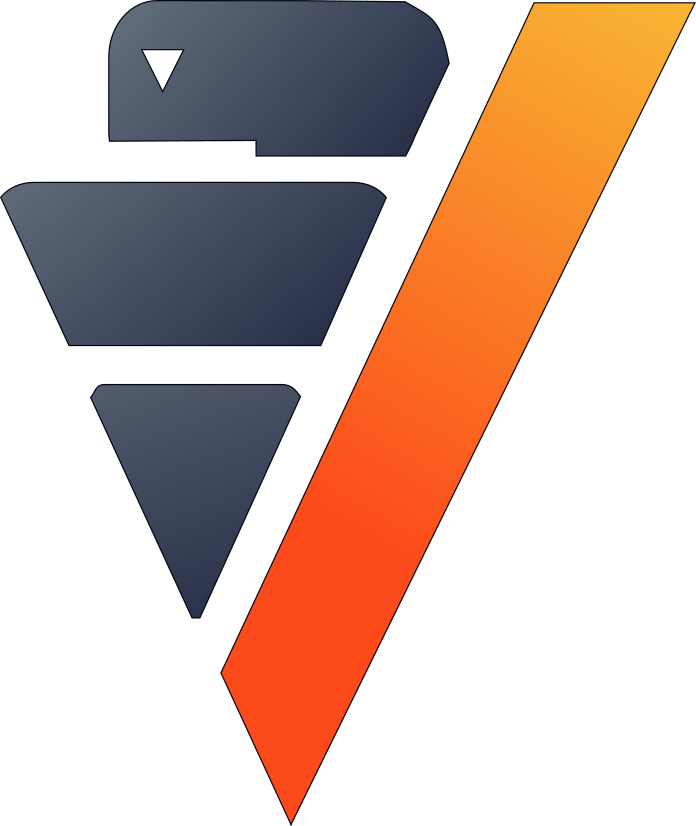

In [14]:
titanic["cabin"].drop()

Let's look at descriptive statistics of the entire Virtual Dataframe.

"pclass"           "survived"               "age"   \\
count                         1234                 1234                 997   \\
unique                           3                    2                  96   \\
top                              3                    0                None   \\
top_percent                 53.728               63.533              19.206   \\
avg               2.28444084278768    0.364667747163695    30.1524573721163   \\
stddev           0.842485636190292    0.481532018641288    14.4353046299159   \\
min                              1                    0                0.33   \\
25%                            1.0                  0.0                21.0   \\
50%                            3.0                  0.0                28.0   \\
75%                            3.0                  1.0                39.0   \\
max                              3                    1                80.0   \\
range                            2                    1               79.67   \\
empty                         None                 None                None   \\
                           "sibsp"              "parch"              "fare"   \\
count                         1234                 1234                1233   \\
unique                           7                    8                 277   \\
top                              0                    0                8.05   \\
top_percent                 67.747               76.904                 4.7   \\
avg              0.504051863857374    0.378444084278768    33.9637936739659   \\
stddev            1.04111727241629    0.868604707790392    52.6460729831293   \\
min                              0                    0                 0.0   \\
25%                            0.0                  0.0              7.8958   \\
50%                            0.0                  0.0             14.4542   \\
75%                            1.0                  0.0             31.3875   \\
max                              8                    9            512.3292   \\
range                            8                    9            512.3292   \\
empty                         None                 None                None   \\
                            "boat"              "name"                "sex"  
count                       1234.0                1234                 1234  
unique                           2                  16                    2  
top                              0                 Mr.                 male  
top_percent                 64.425              59.481               65.964  
avg              0.355753646677472    4.73176661264181      4.6807131280389  
stddev           0.478935143777661    1.08376455904966    0.948042321667023  
min                              0                   4                    4  
25%                            0.0                   4                    4  
50%                            0.0                   4                    4  
75%                            1.0                   5                    6  
max                              1                  10                    6  
range                            1                   6                    2  
empty                         None                   0                    0  
Rows: 1-13 | Columns: 10
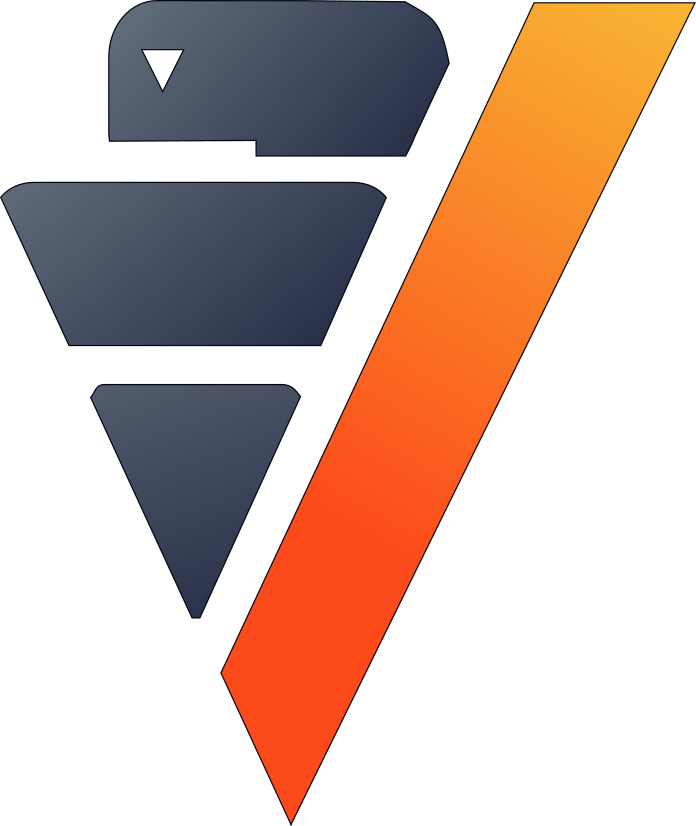

In [15]:
titanic.describe(method = "all")

This method will help us better understand our data. Let's draw histogram for "age".

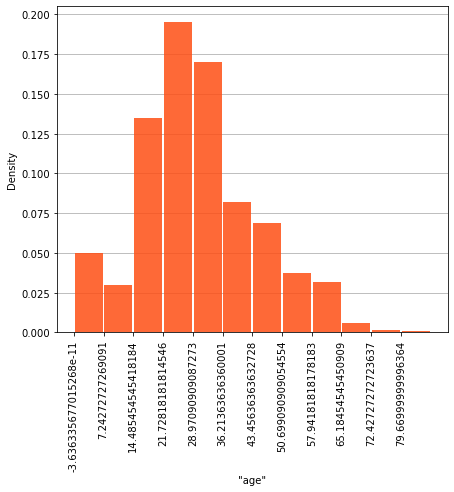

In [16]:
titanic["age"].hist()

We can also perform a Jarque-Bera test to test our hypothesis.

value  
Jarque Bera Test Statistic           28.5338631758186  
p_value                         6.367227064092739e-07  
# Observations Used                             997.0  
Kurtosis - 3                         0.15689691331997  
Skewness                            0.408876460779437  
Distribution Normality                          False  
Rows: 1-6 | Columns: 2
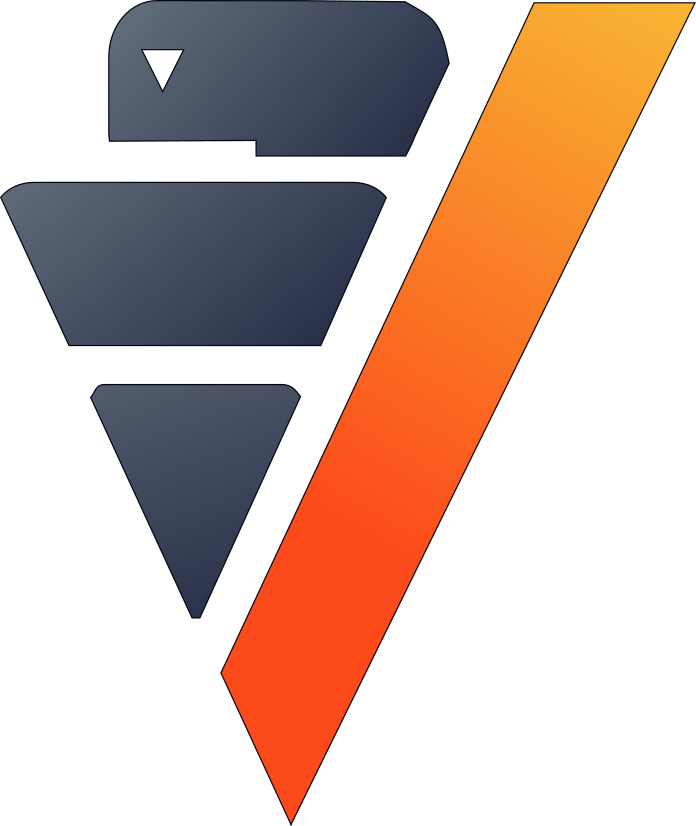

In [17]:
from verticapy.stats import jarque_bera
# Does this follow a normal distribution?
jarque_bera(titanic, "age", alpha = 0.01)

Notice also that the column "fare" has many outliers (The maximum of 512.33 is much greater than the 9th decile of 79.13). Most of the passengers traveled in 3rd class (median of pclass = 3) and much more...

The "sibsp" column represents the number of siblings, while the "parch" column represents the number of parents and children. We can use these to create a new feature: "family_size".

In [18]:
titanic["family_size"] = titanic["parch"] + titanic["sibsp"] + 1

Let's deal with the outliers. We have several options to find them (LocalOutlier Factor, DBSCAN, k-means...) but we will just use winsorization. Our target is the "fare" distribution since it has so many outliers. 

pclass    survived          name       sex     age   \\
1           1           0         Miss.    female     2.0   \\
2           1           0           Mr.      male    30.0   \\
3           1           0          Mrs.    female    25.0   \\
4           1           0           Mr.      male    39.0   \\
5           1           0           Mr.      male    71.0   \\
6           1           0          Col.      male    47.0   \\
7           1           0           Mr.      male    None   \\
8           1           0           Mr.      male    24.0   \\
9           1           0           Mr.      male    36.0   \\
10          1           0           Mr.      male    25.0   \\
11          1           0           Mr.      male    45.0   \\
12          1           0           Mr.      male    42.0   \\
13          1           0           Mr.      male    41.0   \\
14          1           0           Mr.      male    48.0   \\
15          1           0           Dr.      male    None   \\
16          1           0        Major.      male    45.0   \\
17          1           0           Mr.      male    None   \\
18          1           0           Mr.      male    33.0   \\
19          1           0           Mr.      male    28.0   \\
20          1           0           Mr.      male    17.0   \\
21          1           0           Mr.      male    49.0   \\
22          1           0           Mr.      male    36.0   \\
23          1           0           Mr.      male    46.0   \\
24          1           0           Mr.      male    None   \\
25          1           0           Mr.      male    27.0   \\
26          1           0           Mr.      male    None   \\
27          1           0           Mr.      male    47.0   \\
28          1           0           Mr.      male    37.0   \\
29          1           0           Mr.      male    None   \\
30          1           0         Capt.      male    70.0   \\
31          1           0           Mr.      male    39.0   \\
32          1           0           Mr.      male    31.0   \\
33          1           0           Mr.      male    50.0   \\
34          1           0           Mr.      male    39.0   \\
35          1           0         Miss.    female    36.0   \\
36          1           0           Mr.      male    None   \\
37          1           0           Mr.      male    30.0   \\
38          1           0           Mr.      male    19.0   \\
39          1           0           Mr.      male    64.0   \\
40          1           0           Mr.      male    None   \\
41          1           0           Mr.      male    None   \\
42          1           0           Mr.      male    37.0   \\
43          1           0           Mr.      male    47.0   \\
44          1           0           Mr.      male    24.0   \\
45          1           0           Mr.      male    71.0   \\
46          1           0           Mr.      male    38.0   \\
47          1           0           Mr.      male    46.0   \\
48          1           0           Mr.      male    None   \\
49          1           0           Mr.      male    45.0   \\
50          1           0           Mr.      male    40.0   \\
51          1           0           Mr.      male    55.0   \\
52          1           0           Mr.      male    42.0   \\
53          1           0           Mr.      male    None   \\
54          1           0           Mr.      male    55.0   \\
55          1           0           Mr.      male    42.0   \\
56          1           0           Mr.      male    None   \\
57          1           0         Miss.    female    50.0   \\
58          1           0           Mr.      male    46.0   \\
59          1           0           Mr.      male    50.0   \\
60          1           0           Mr.      male    32.5   \\
61          1           0           Mr.      male    58.0   \\
62          1           0           Mr.      male    41.0   \\
63          1           0           Mr
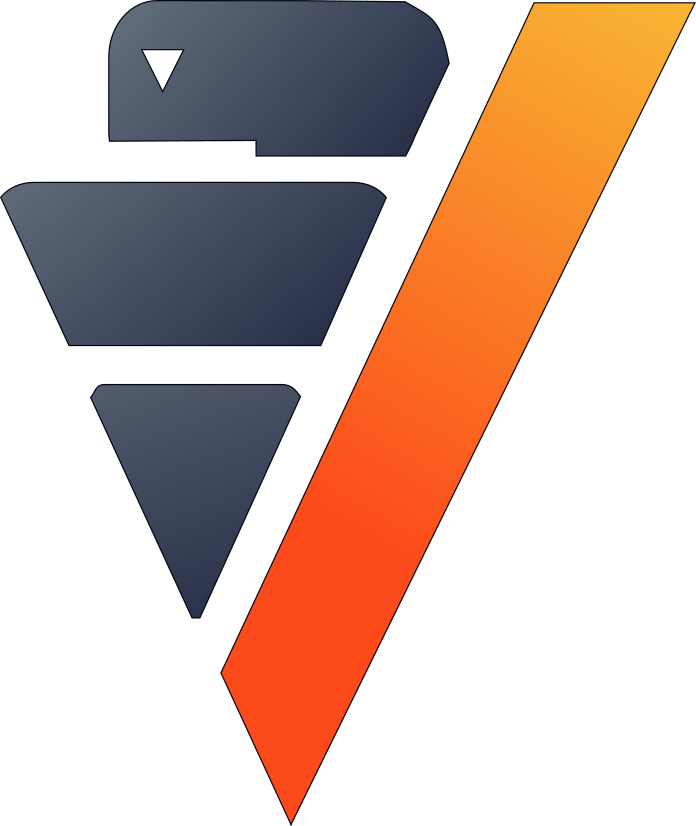

In [19]:
# Limit extreme values, all data above 97th percentile, is set to 97th percentile
titanic["fare"].fill_outliers(method = "winsorize", 
                              alpha = 0.03)

Let's encode the column "sex" so we can use it with numerical methods. 

pclass    survived          name    sex     age   \\
1           1           0         Miss.      0     2.0   \\
2           1           0           Mr.      1    30.0   \\
3           1           0          Mrs.      0    25.0   \\
4           1           0           Mr.      1    39.0   \\
5           1           0           Mr.      1    71.0   \\
6           1           0          Col.      1    47.0   \\
7           1           0           Mr.      1    None   \\
8           1           0           Mr.      1    24.0   \\
9           1           0           Mr.      1    36.0   \\
10          1           0           Mr.      1    25.0   \\
11          1           0           Mr.      1    45.0   \\
12          1           0           Mr.      1    42.0   \\
13          1           0           Mr.      1    41.0   \\
14          1           0           Mr.      1    48.0   \\
15          1           0           Dr.      1    None   \\
16          1           0        Major.      1    45.0   \\
17          1           0           Mr.      1    None   \\
18          1           0           Mr.      1    33.0   \\
19          1           0           Mr.      1    28.0   \\
20          1           0           Mr.      1    17.0   \\
21          1           0           Mr.      1    49.0   \\
22          1           0           Mr.      1    36.0   \\
23          1           0           Mr.      1    46.0   \\
24          1           0           Mr.      1    None   \\
25          1           0           Mr.      1    27.0   \\
26          1           0           Mr.      1    None   \\
27          1           0           Mr.      1    47.0   \\
28          1           0           Mr.      1    37.0   \\
29          1           0           Mr.      1    None   \\
30          1           0         Capt.      1    70.0   \\
31          1           0           Mr.      1    39.0   \\
32          1           0           Mr.      1    31.0   \\
33          1           0           Mr.      1    50.0   \\
34          1           0           Mr.      1    39.0   \\
35          1           0         Miss.      0    36.0   \\
36          1           0           Mr.      1    None   \\
37          1           0           Mr.      1    30.0   \\
38          1           0           Mr.      1    19.0   \\
39          1           0           Mr.      1    64.0   \\
40          1           0           Mr.      1    None   \\
41          1           0           Mr.      1    None   \\
42          1           0           Mr.      1    37.0   \\
43          1           0           Mr.      1    47.0   \\
44          1           0           Mr.      1    24.0   \\
45          1           0           Mr.      1    71.0   \\
46          1           0           Mr.      1    38.0   \\
47          1           0           Mr.      1    46.0   \\
48          1           0           Mr.      1    None   \\
49          1           0           Mr.      1    45.0   \\
50          1           0           Mr.      1    40.0   \\
51          1           0           Mr.      1    55.0   \\
52          1           0           Mr.      1    42.0   \\
53          1           0           Mr.      1    None   \\
54          1           0           Mr.      1    55.0   \\
55          1           0           Mr.      1    42.0   \\
56          1           0           Mr.      1    None   \\
57          1           0         Miss.      0    50.0   \\
58          1           0           Mr.      1    46.0   \\
59          1           0           Mr.      1    50.0   \\
60          1           0           Mr.      1    32.5   \\
61          1           0           Mr.      1    58.0   \\
62          1           0           Mr.      1    41.0   \\
63          1           0           Mr.      1    None   \\
64          1           0           Mr.      1    None   \\
65          1           0           Mr.      1    29.0   \\
66          1           0           Mr.      1 
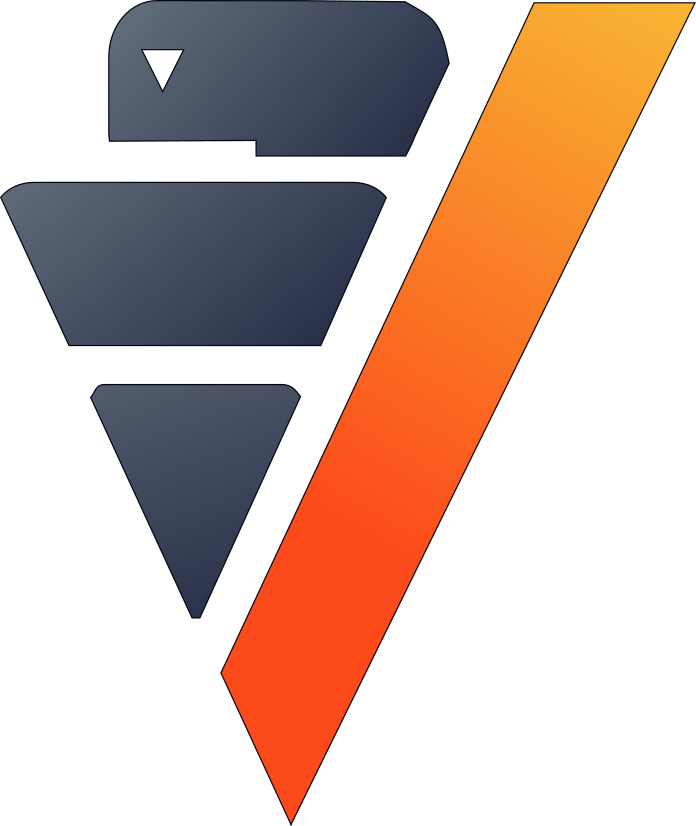

In [20]:
titanic["sex"].label_encode()

In [16]:
#print(titanic.current_relation())

The column "age" has too many missing values and since most machine learning algorithms don't handle missing values, we need to use imputation techniques. Let's fill the missing values using the average "age" of the passengers that have the same "pclass" and "sex."

237 elements were filled.


pclass    survived          name    sex                 age   \\
1           1           1         Miss.      0                36.0   \\
2           1           1         Miss.      0                31.0   \\
3           1           1         Miss.      0                21.0   \\
4           1           1          Mrs.      0                50.0   \\
5           1           1          Mrs.      0                45.0   \\
6           1           1         Miss.      0                31.0   \\
7           1           1          Mrs.      0                55.0   \\
8           1           1          Mrs.      0                60.0   \\
9           1           1         Miss.      0                35.0   \\
10          1           1          Mrs.      0    37.2635658914729   \\
11          1           1          Mrs.      0                39.0   \\
12          1           1          Mrs.      0    37.2635658914729   \\
13          1           1          Mrs.      0                39.0   \\
14          1           1         Miss.      0                18.0   \\
15          1           1          Mrs.      0                48.0   \\
16          1           1          Mrs.      0                62.0   \\
17          1           1          Mrs.      0                52.0   \\
18          1           1          Mrs.      0                43.0   \\
19          1           1          Mrs.      0    37.2635658914729   \\
20          1           1          Mrs.      0                40.0   \\
21          1           1          Mrs.      0                23.0   \\
22          1           1          Mrs.      0                18.0   \\
23          1           1          Mrs.      0                39.0   \\
24          1           1         Miss.      0                40.0   \\
25          1           1         Miss.      0                30.0   \\
26          1           1          Mrs.      0                35.0   \\
27          1           1         Mlle.      0                24.0   \\
28          1           1          Mrs.      0                48.0   \\
29          1           1         Miss.      0                18.0   \\
30          1           1          Mrs.      0                54.0   \\
31          1           1     Countess.      0                33.0   \\
32          1           1         Miss.      0                33.0   \\
33          1           1          Mrs.      0                43.0   \\
34          1           1          Mrs.      0                56.0   \\
35          1           1         Miss.      0                30.0   \\
36          1           1          Mrs.      0                17.0   \\
37          1           1          Mrs.      0                22.0   \\
38          1           1         Miss.      0                22.0   \\
39          1           1         Dona.      0                39.0   \\
40          1           1         Miss.      0                19.0   \\
41          1           1         Miss.      0                23.0   \\
42          1           1         Miss.      0                31.0   \\
43          1           1          Mrs.      0                37.0   \\
44          1           1         Miss.      0                33.0   \\
45          1           1          Mrs.      0    37.2635658914729   \\
46          1           1          Mrs.      0                18.0   \\
47          1           1         Miss.      0                16.0   \\
48          1           1         Miss.      0                15.0   \\
49          1           1         Miss.      0                58.0   \\
50          1           1         Miss.      0                21.0   \\
51          1           1          Mrs.      0                51.0   \\
52          1           1         Miss.      0                16.0   \\
53          1           1          Mrs.      0                55.0   \\
54          1           1           Dr.      0                49.0   \\
55          1           1         Miss.      0 
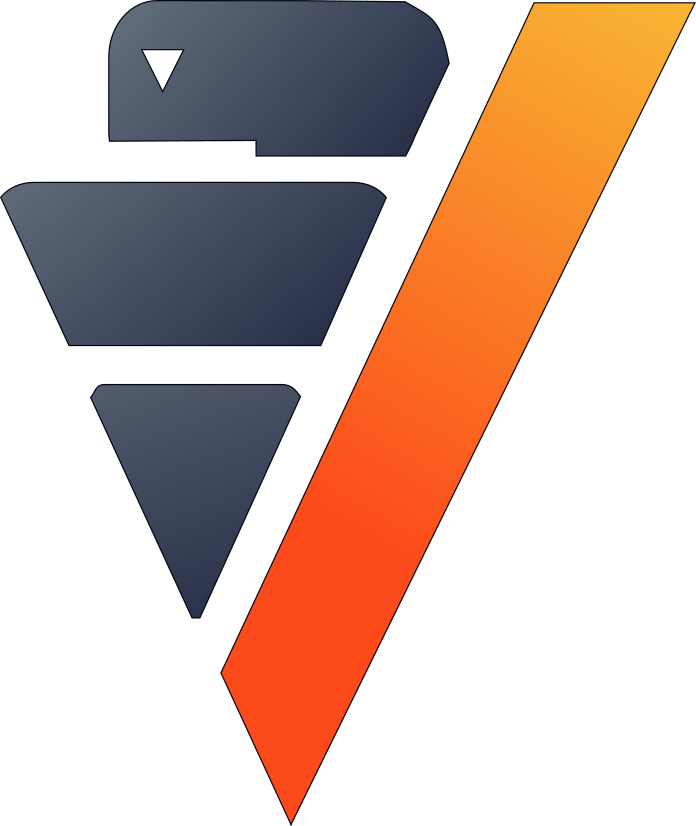

In [21]:
titanic["age"].fillna(method = "mean", by = ["pclass", "sex"])

Let's draw the correlation matrix to see the links between variables.

"pclass"              "survived"                 "sex"   \\
"pclass"                           1.0      -0.335634606444129     0.150967389146603   \\
"survived"          -0.335634606444129                     1.0    -0.528849820180154   \\
"sex"                0.150967389146603      -0.528849820180154                   1.0   \\
"age"               -0.447455588651876    -0.00336824465604963    0.0659428426025525   \\
"sibsp"            -0.0691851178284916      0.0934303518392484    -0.184712709381236   \\
"parch"            -0.0429882472107741       0.171691455579124    -0.246951353519755   \\
"fare"              -0.722423468046863       0.322278285934243    -0.264115871968389   \\
"boat"              -0.344146454498079       0.949194918072845    -0.484361066873315   \\
"family_size"       -0.109035609183308       0.185599315104602    -0.284892754418329   \\
                                  "age"                "sibsp"                "parch"   \\
"pclass"             -0.447455588651876    -0.0691851178284916    -0.0429882472107741   \\
"survived"         -0.00336824465604963     0.0934303518392484      0.171691455579124   \\
"sex"                0.0659428426025525     -0.184712709381236     -0.246951353519755   \\
"age"                               1.0     -0.116480956583223     -0.174615632035404   \\
"sibsp"              -0.116480956583223                    1.0      0.436524985907755   \\
"parch"              -0.174615632035404      0.436524985907755                    1.0   \\
"fare"                0.228529791943121      0.444010325371998      0.402198981036797   \\
"boat"              0.00421157947473071      0.100652268255772      0.175393711669708   \\
"family_size"        -0.133316437156597      0.854550816071704      0.776055413048162   \\
                               "fare"                 "boat"         "family_size"  
"pclass"           -0.722423468046863     -0.344146454498079    -0.109035609183308  
"survived"          0.322278285934243      0.949194918072845     0.185599315104602  
"sex"              -0.264115871968389     -0.484361066873315    -0.284892754418329  
"age"               0.228529791943121    0.00421157947473071    -0.133316437156597  
"sibsp"             0.444010325371998      0.100652268255772     0.854550816071704  
"parch"             0.402198981036797      0.175393711669708     0.776055413048162  
"fare"                            1.0      0.334910192561693      0.52665819103252  
"boat"              0.334910192561693                    1.0     0.190320484343677  
"family_size"        0.52665819103252      0.190320484343677                   1.0  
Rows: 1-9 | Columns: 10
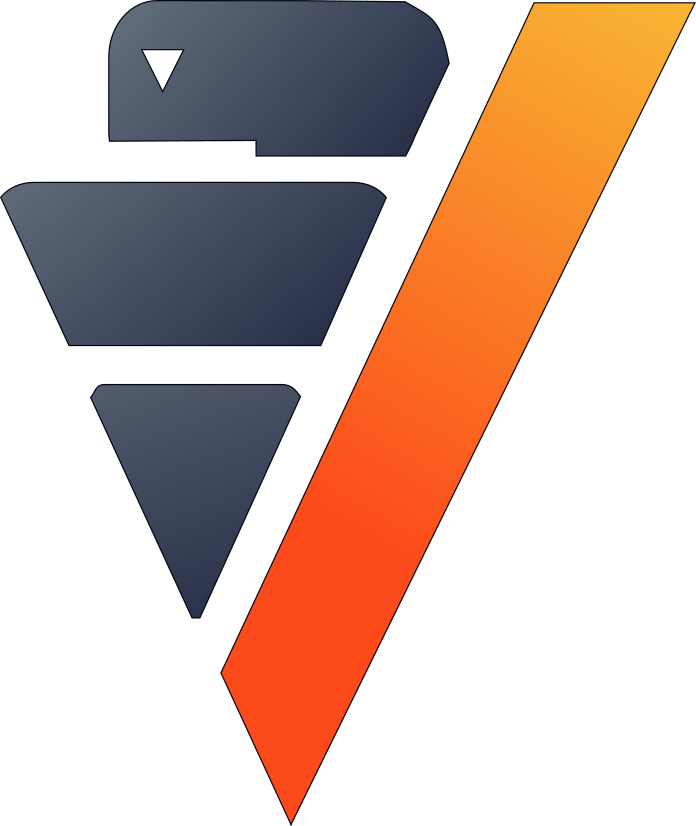

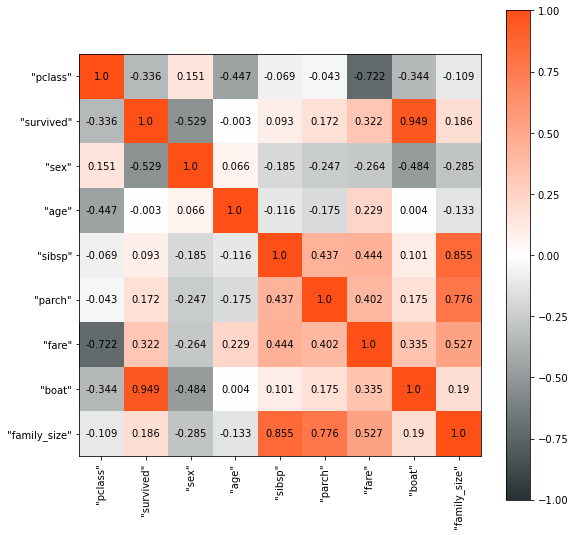

In [22]:
titanic.corr(method = "spearman")

Fare correlates strongly with family size. This is about what you would expect: it makes sense that the larger the family, the more tickets they'd have to buy, and the greater the fare.

Survival correlates strongly with whether or not a passenger has a lifeboat (the "boat" variable). Still, to increase the generality of our model, we should avoid predictions based on just one variable. Let's split the study into two use cases:

<ul>
    <li>Passengers with a lifeboat</li>
    <li>Passengers without a lifeboat</li>
</ul>

Before we move on: we did a lot of work to clean up this data, but we haven't saved anything to our Vertica database! We can look at our vDataFrame to be sure.

In [23]:
print(titanic.current_relation())

(
   SELECT
     "pclass",
     "survived",
     "name",
     "sex",
     COALESCE("age", AVG("age") OVER (PARTITION BY "pclass", "sex")) AS "age",
     "sibsp",
     "parch",
     "fare",
     "boat",
     "family_size" 
   FROM
 (
   SELECT
     "pclass",
     "survived",
     REGEXP_SUBSTR("name", ' ([A-Za-z]+)\.') AS "name",
     DECODE("sex", 'female', 0, 'male', 1, 2) AS "sex",
     "age",
     "sibsp",
     "parch",
     (CASE WHEN "fare" < -176.6204982585513 THEN -176.6204982585513 WHEN "fare" > 244.5480856064831 THEN 244.5480856064831 ELSE "fare" END) AS "fare",
     DECODE("boat", NULL, 0, 1) AS "boat",
     (("parch") + ("sibsp")) + (1) AS "family_size" 
   FROM
 (
   SELECT
     "pclass",
     "survived",
     "name",
     "sex",
     "age",
     "sibsp",
     "parch",
     "fare",
     "boat" 
   FROM
 "public"."titanic") 
VERTICAPY_SUBTABLE) 
VERTICAPY_SUBTABLE) 
VERTICAPY_SUBTABLE


Let see what's happening when we aggregate and turn on SQL generation.

avg  
"pclass"            2.28444084278768  
"survived"         0.364667747163695  
"sex"              0.659643435980551  
"age"                29.717623352014  
"sibsp"            0.504051863857374  
"parch"            0.378444084278768  
"fare"              32.9113074018842  
"boat"             0.355753646677472  
"family_size"       1.88249594813614  
Rows: 1-9 | Columns: 2
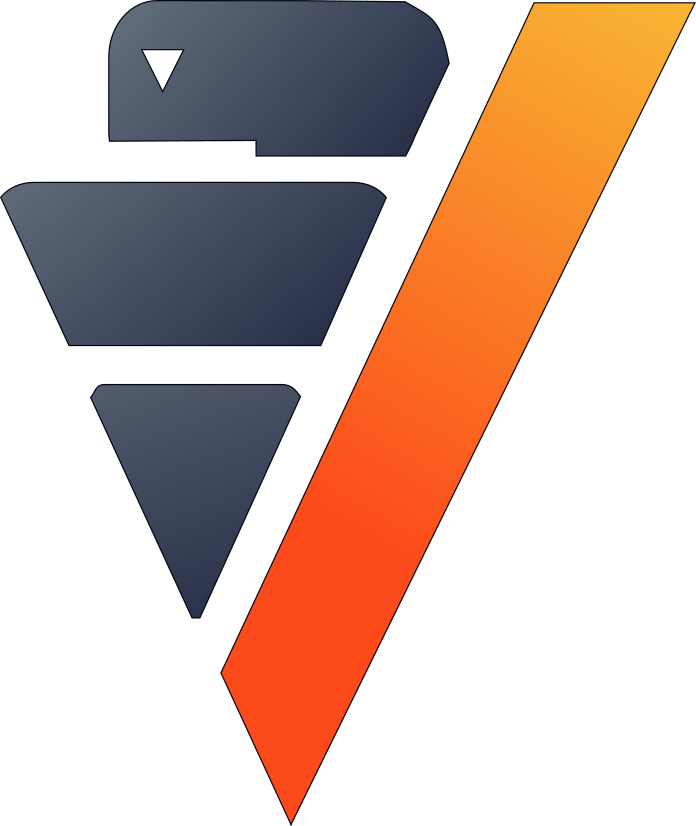

In [24]:
set_option("sql_on", True)
titanic.avg()

VerticaPy dynamically generates SQL code whenever you make modifications to your data. It will also store computed aggregations to avoid unnecessary recomputation. If we filter anything, it will update the catalog with our modifications.

In [25]:
set_option("sql_on", False)
print(titanic.info())

The vDataFrame was modified many times: 
 * {Sat May 15 12:33:06 2021} [Drop]: vColumn "body" was deleted from the vDataFrame.
 * {Sat May 15 12:33:07 2021} [Drop]: vColumn "home.dest" was deleted from the vDataFrame.
 * {Sat May 15 12:33:07 2021} [Drop]: vColumn "embarked" was deleted from the vDataFrame.
 * {Sat May 15 12:33:07 2021} [Drop]: vColumn "ticket" was deleted from the vDataFrame.
 * {Sat May 15 12:33:07 2021} [Apply]: The vColumn 'cabin' was transformed with the func 'x -> SUBSTR(x, 1, 1)'.
 * {Sat May 15 12:33:07 2021} [Apply]: The vColumn 'name' was transformed with the func 'x -> REGEXP_SUBSTR(x, ' ([A-Za-z]+)\.')'.
 * {Sat May 15 12:33:08 2021} [Fillna]: 795 "boat" missing values were  filled.
 * {Sat May 15 12:33:08 2021} [Fillna]: 948 "cabin" missing values were  filled.
 * {Sat May 15 12:33:13 2021} [Drop]: vColumn "cabin" was deleted from the vDataFrame.
 * {Sat May 15 12:33:46 2021} [Eval]: A new vColumn "family_size" was added to the vDataFrame.
 * {Sat May 15 12

Let's move on to data modeling. Save the vDataframe in your Vertica database.

In [26]:
from verticapy import drop_view
drop_view("titanic_boat")
drop_view("titanic_no_boat")

titanic_boat = titanic.search(conditions = ["boat = 1"])
titanic_no_boat = titanic.search(conditions = ["boat = 0"])
#titanic.to_dbtitanic.filter(titanic["boat"] == 1)

c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\utilities.py:1894: Warning: utilities.drop_view has been deprecated. It will be removed in v0.5.1. Use utilities.drop_view with parameter 'method' set to 'view' instead
  warnings.warn(
c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\utilities.py:258: Warning: The view 'titanic_boat' doesn't exist or can not be dropped !
Use parameter: raise_error = True to get more information.
  warnings.warn(warning_message, Warning)
c:\users\psingh5\appdata\local\programs\python\python38-32\lib\site-packages\verticapy\utilities.py:258: Warning: The view 'titanic_no_boat' doesn't exist or can not be dropped !
Use parameter: raise_error = True to get more information.
  warnings.warn(warning_message, Warning)


pclass    survived          name    sex                 age   \\
1           1           1           Mr.      1    40.9822068965517   \\
2           1           1           Mr.      1                21.0   \\
3           1           1           Mr.      1                31.0   \\
4           1           1           Mr.      1                17.0   \\
5           1           1           Mr.      1                48.0   \\
6           1           1           Mr.      1                54.0   \\
7           1           1           Dr.      1                32.0   \\
8           1           1           Mr.      1                45.0   \\
9           1           1       Master.      1                 6.0   \\
10          1           1           Mr.      1                24.0   \\
11          1           1           Mr.      1                28.0   \\
12          1           1          Col.      1                56.0   \\
13          1           1           Mr.      1                35.0   \\
14          1           1           Mr.      1                34.0   \\
15          1           1           Mr.      1    40.9822068965517   \\
16          1           1           Mr.      1    40.9822068965517   \\
17          1           1       Master.      1                13.0   \\
18          1           1           Mr.      1    40.9822068965517   \\
19          1           1        Major.      1                52.0   \\
20          1           1           Mr.      1    40.9822068965517   \\
21          1           1           Mr.      1                30.0   \\
22          1           1           Mr.      1                36.0   \\
23          1           1           Mr.      1    40.9822068965517   \\
24          1           1           Mr.      1                35.0   \\
25          1           1           Mr.      1                42.0   \\
26          1           1           Mr.      1                49.0   \\
27          1           1           Mr.      1                38.0   \\
28          1           1           Mr.      1    40.9822068965517   \\
29          1           1           Mr.      1                27.0   \\
30          1           1           Mr.      1                48.0   \\
31          1           1           Mr.      1                25.0   \\
32          1           1           Mr.      1                23.0   \\
33          1           1          Col.      1                53.0   \\
34          1           1           Mr.      1                49.0   \\
35          1           1           Mr.      1                60.0   \\
36          1           1           Mr.      1                43.0   \\
37          1           1           Dr.      1                50.0   \\
38          1           1       Master.      1                 4.0   \\
39          1           1           Dr.      1                53.0   \\
40          1           1           Mr.      1                31.0   \\
41          1           1           Mr.      1                27.0   \\
42          1           1           Mr.      1                51.0   \\
43          1           1           Mr.      1                45.0   \\
44          1           1           Mr.      1                27.0   \\
45          1           1           Mr.      1                36.0   \\
46          1           1       Master.      1                11.0   \\
47          1           1           Mr.      1                36.0   \\
48          1           1           Mr.      1                42.0   \\
49          1           1           Mr.      1                40.0   \\
50          1           1           Mr.      1                28.0   \\
51          1           1           Mr.      1                25.0   \\
52          1           1           Mr.      1                26.0   \\
53          1           1           Mr.      1                37.0   \\
54          1           1           Mr.      1                80.0   \\
55          1           1           Mr.      1 
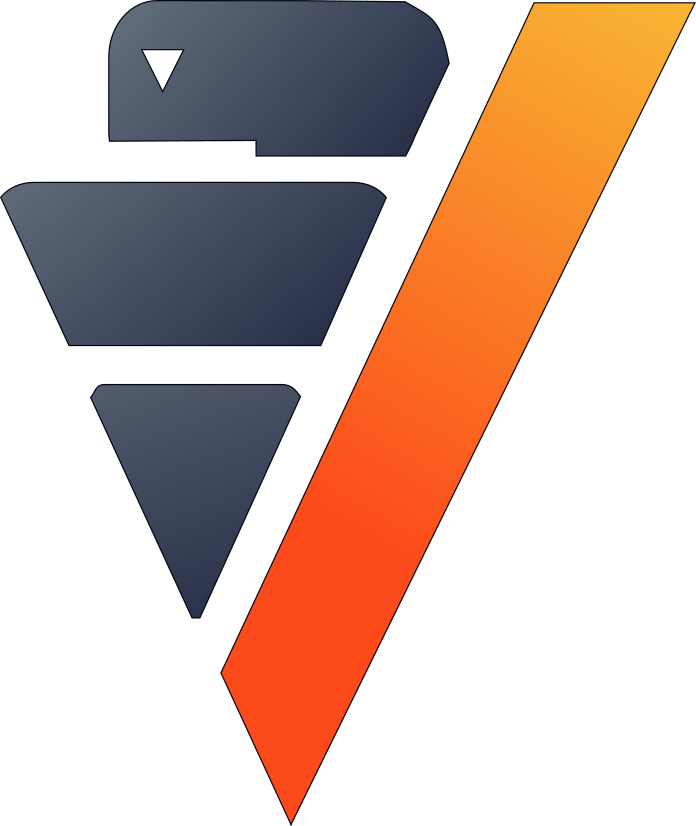

In [27]:
titanic_boat.to_db(name = '"public"."titanic_boat"')

pclass    survived          name    sex                 age   \\
1           2           1          Mrs.      0                28.0   \\
2           2           1          Mrs.      0                30.0   \\
3           2           1          Mrs.      0                14.0   \\
4           2           1          Mrs.      0                42.0   \\
5           2           1         Miss.      0                17.0   \\
6           2           1          Mrs.      0                34.0   \\
7           2           1         Miss.      0                18.0   \\
8           2           1          Mrs.      0                42.0   \\
9           2           0          Mrs.      0                27.0   \\
10          2           0          Mrs.      0                57.0   \\
11          2           0          Mrs.      0                26.0   \\
12          2           0          Mrs.      0                22.0   \\
13          2           0          Mrs.      0                60.0   \\
14          2           0         Miss.      0                18.0   \\
15          2           0         Miss.      0                38.0   \\
16          2           0          Mrs.      0    27.7654347826087   \\
17          2           0          Mrs.      0                30.0   \\
18          2           0          Mrs.      0                29.0   \\
19          2           0          Mrs.      0                44.0   \\
20          1           0           Mr.      1                62.0   \\
21          1           0           Mr.      1    40.9822068965517   \\
22          1           0           Mr.      1                51.0   \\
23          1           0           Mr.      1                27.0   \\
24          1           0           Mr.      1                50.0   \\
25          1           0           Mr.      1                57.0   \\
26          1           0           Mr.      1                21.0   \\
27          1           0           Mr.      1                54.0   \\
28          1           0          Col.      1                60.0   \\
29          1           0           Mr.      1                64.0   \\
30          1           0           Mr.      1                47.0   \\
31          1           0           Mr.      1                61.0   \\
32          1           0          Don.      1                40.0   \\
33          1           0           Mr.      1                49.0   \\
34          1           0           Mr.      1                52.0   \\
35          1           0           Mr.      1                61.0   \\
36          1           0           Mr.      1                67.0   \\
37          1           0           Mr.      1    40.9822068965517   \\
38          1           0           Mr.      1                62.0   \\
39          1           0           Mr.      1                57.0   \\
40          1           0           Mr.      1    40.9822068965517   \\
41          1           0           Mr.      1                24.0   \\
42          1           0           Mr.      1                56.0   \\
43          1           0           Mr.      1                56.0   \\
44          1           0           Mr.      1                50.0   \\
45          1           0           Mr.      1                61.0   \\
46          1           0           Mr.      1                33.0   \\
47          1           0           Mr.      1                55.0   \\
48          1           0           Mr.      1                36.0   \\
49          1           0           Mr.      1    40.9822068965517   \\
50          1           0           Mr.      1                31.0   \\
51          1           0           Mr.      1    40.9822068965517   \\
52          1           0           Mr.      1                22.0   \\
53          1           0     Jonkheer.      1                38.0   \\
54          1           0           Mr.      1                47.0   \\
55          1           0           Mr.      1 
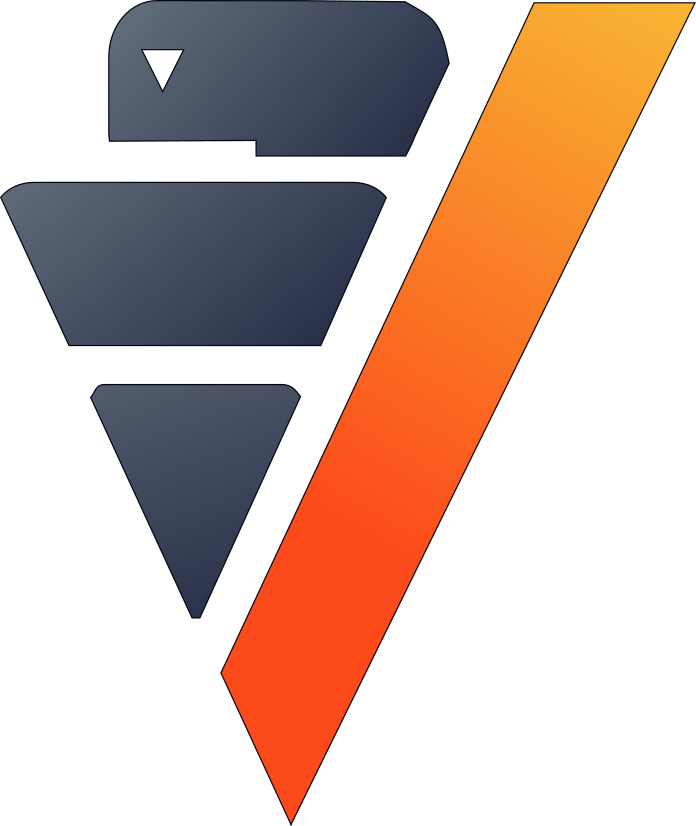

In [28]:
titanic_no_boat.to_db(name = '"public"."titanic_no_boat"')

## Machine Learning

### Passengers with a lifeboat


First, let's look at the number of survivors.

value  
name        "survived"  
dtype              int  
unique             2.0  
count            439.0  
1                  430  
0                    9  
Rows: 1-6 | Columns: 2
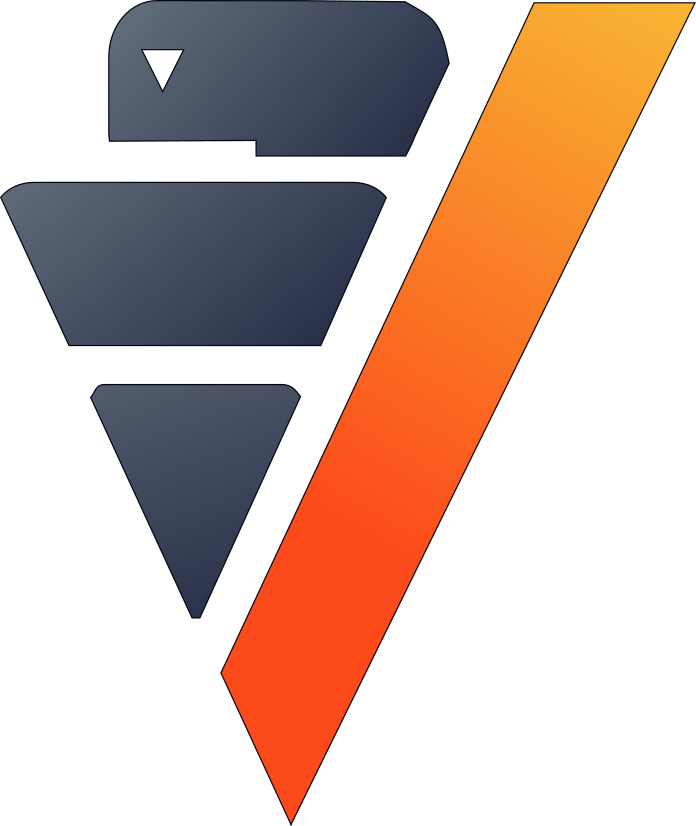

In [29]:
from verticapy import vDataFrame
titanic_boat = vDataFrame("titanic_boat")
titanic_boat["survived"].describe()

We have 9 deaths. Let's try to understand why these passengers died.

pclass    survived     name    sex                 age   \\
1          1           0      Mr.      1    40.9822068965517   \\
2          1           0      Mr.      1                36.0   \\
3          3           0     Mrs.      0                30.0   \\
4          3           0      Mr.      1                27.0   \\
5          3           0      Mr.      1                36.0   \\
6          3           0      Mr.      1    26.2142058823529   \\
7          3           0      Mr.      1                25.0   \\
8          3           0      Mr.      1                32.0   \\
9          2           0      Mr.      1                34.0   \\
      sibsp    parch       fare    boat    family_size  
1         0        0    30.6958       1              1  
2         0        0    75.2417       1              1  
3         1        0      15.55       1              2  
4         1        0    14.4542       1              2  
5         1        0      15.55       1              2  
6         0        0       7.25       1              1  
7         0        0       7.25       1              1  
8         1        0      15.85       1              2  
9         1        0       21.0       1              2  
Rows: 1-9 | Columns: 10
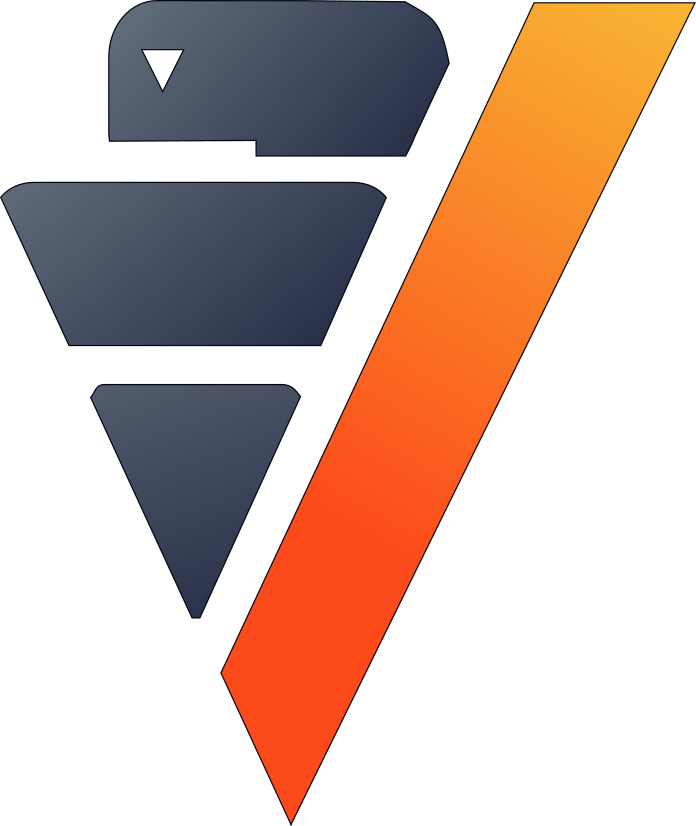

In [30]:
#titanic_boat.filter(titanic_boat["survived"] == 0).head(10)
titanic_boat.search(conditions = ["survived = 0"])

Apart from third-class passengers, it doesn't seem like these passengers have any predictors for their deaths. Making a model out of this would be unhelpful. 

### Passengers without a lifeboat

Let's move on to passengers without a lifeboat. 

value  
name        "survived"  
dtype              int  
unique             2.0  
count            795.0  
0                  775  
1                   20  
Rows: 1-6 | Columns: 2
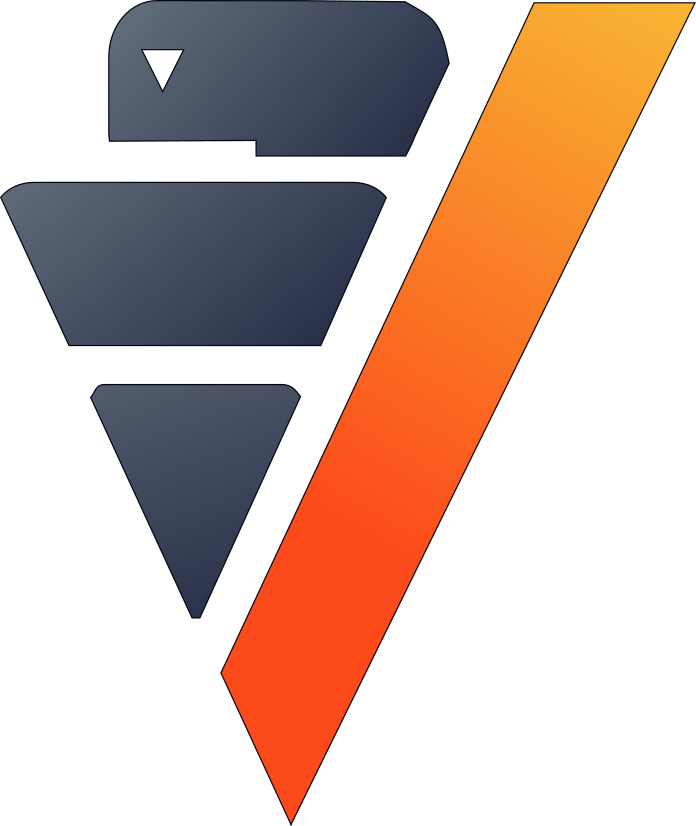

In [31]:
titanic_boat = vDataFrame("titanic_no_boat")
titanic_boat["survived"].describe()

Only 20 survived. Let's find out why.

pclass    survived      name    sex                 age   \\
1          2           1      Mrs.      0                28.0   \\
2          2           1      Mrs.      0                30.0   \\
3          2           1      Mrs.      0                14.0   \\
4          2           1      Mrs.      0                42.0   \\
5          2           1     Miss.      0                17.0   \\
6          2           1      Mrs.      0                34.0   \\
7          2           1     Miss.      0                18.0   \\
8          2           1      Mrs.      0                42.0   \\
9          3           1      Mrs.      0                15.0   \\
10         3           1      Mrs.      0                47.0   \\
11         3           1     Miss.      0    22.5766423357664   \\
12         3           1      Mrs.      0                31.0   \\
13         3           1      Mrs.      0    22.5766423357664   \\
14         3           1     Miss.      0                27.0   \\
15         3           1     Miss.      0                26.0   \\
16         3           1     Miss.      0                23.0   \\
17         3           1      Mrs.      0                33.0   \\
18         1           1     Miss.      0                58.0   \\
19         3           1       Mr.      1    26.2142058823529   \\
20         3           1       Mr.      1    26.2142058823529   \\
      sibsp    parch        fare    boat    family_size  
1         0        0       12.65       0              1  
2         3        0        21.0       0              4  
3         1        0     30.0708       0              2  
4         1        0        26.0       0              2  
5         0        0        10.5       0              1  
6         0        1        23.0       0              2  
7         0        1        23.0       0              2  
8         0        0        13.0       0              1  
9         1        0     14.4542       0              2  
10        1        0         7.0       0              2  
11        0        0      7.7792       0              1  
12        0        0      8.6833       0              1  
13        0        0      7.2292       0              1  
14        0        0       7.925       0              1  
15        0        0       7.925       0              1  
16        0        0        8.05       0              1  
17        3        0       15.85       0              4  
18        0        0    146.5208       0              1  
19        0        0        7.75       0              1  
20        0        0        7.75       0              1  
Rows: 1-20 | Columns: 10
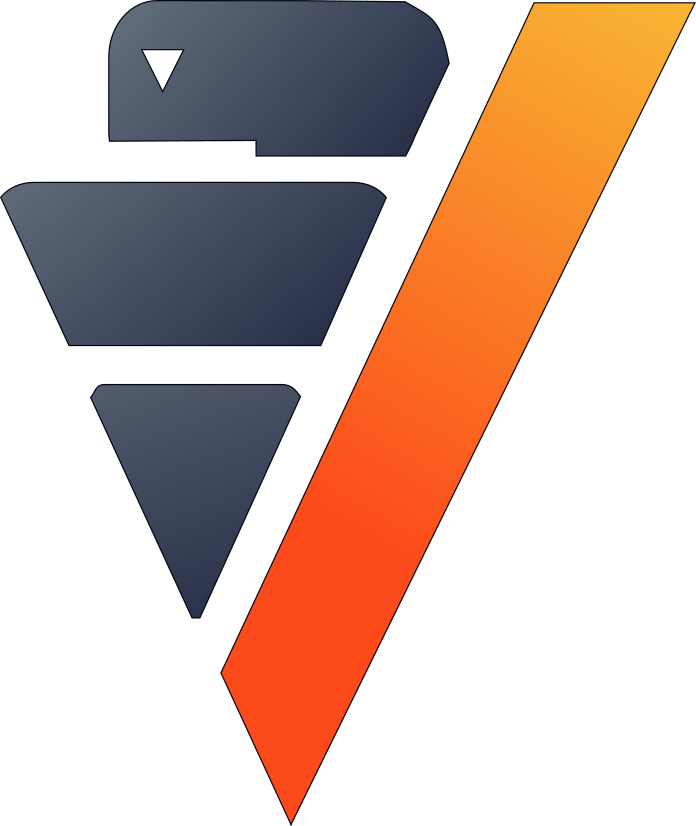

In [32]:
#titanic_boat.filter(titanic_boat["survived"] == 1).head(20)
titanic_boat.search(conditions = ["survived = 1"])

Most survivors seem to be women. Let's build a model with this.

One of our predictors is categorical: the passenger title. Some of these predictors are corrleated, so it'd be best to work with a non-linear classifier that can handle that. In this case, random forest seems to be perfect. Let's evaluate it with a cross validation.

auc                prc_auc                accuracy   \\
1-fold        0.8879699248120301     0.6754773716978664      0.9816176470588235   \\
2-fold        0.9605532786885245     0.8347570850202429      0.9682539682539683   \\
3-fold        0.9986394557823131     0.6061250953470634      0.9595141700404858   \\
avg           0.9490542197609558     0.7054531840217242      0.9697952617844259   \\
std         0.056223727539717404    0.11722652715505813    0.011132053421777968   \\
                        log_loss    precision    recall    f1_score   \\
1-fold        0.0366917306111258            0       0.0         0.0   \\
2-fold        0.0408059353581586            0       0.0         0.0   \\
3-fold        0.0198082845094729            0       0.0         0.0   \\
avg          0.03243531682625243          0.0       0.0         0.0   \\
std         0.011127134807391921          0.0       0.0         0.0   \\
            mcc    informedness               markedness    csi   \\
1-fold        0             0.0    -0.018382352941176516    0.0   \\
2-fold        0             0.0    -0.031746031746031744    0.0   \\
3-fold        0             0.0     -0.04048582995951422    0.0   \\
avg         0.0             0.0     -0.03020473821557416    0.0   \\
std         0.0             0.0     0.011132053421777968    0.0   \\
                           time  
1-fold       1.2036113739013672  
2-fold       1.2021071910858154  
3-fold       1.2195441722869873  
avg          1.2084209124247234  
std         0.00966234050105047  
Rows: 1-5 | Columns: 13
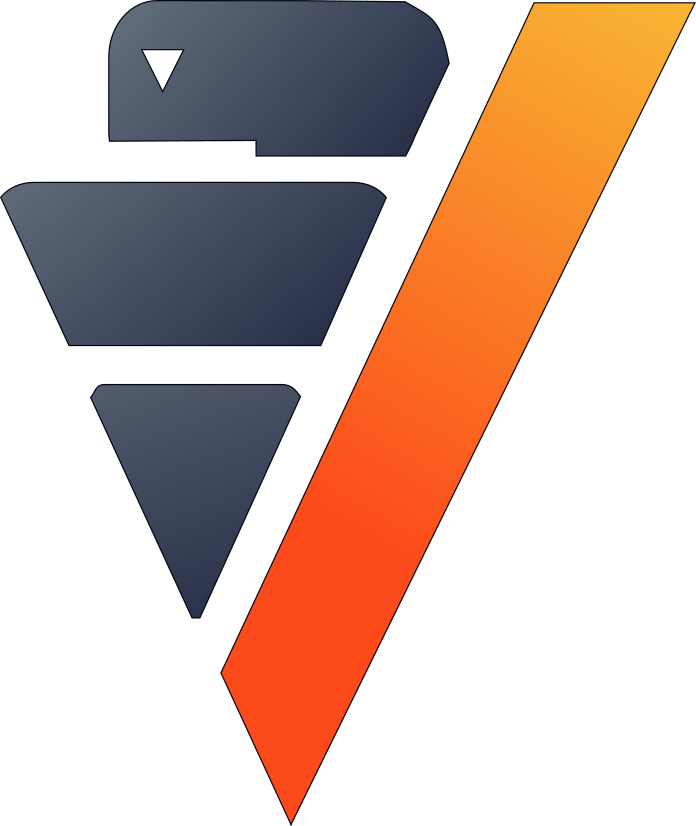

In [33]:
from verticapy.learn.ensemble import RandomForestClassifier
from verticapy.learn.model_selection import cross_validate

predictors = titanic.get_columns(exclude_columns = ['"survived"'])
response = "survived"
relation = "titanic_no_boat"
model = RandomForestClassifier("rf_titanic", 
                               n_estimators = 40, 
                               max_depth = 4)
cross_validate(model, relation, predictors, response)

This dataset is pretty unbalanced so we'll use AUC to evaluate it.

The model is very good with an average greater than 0.9!

We can now build a model with the entire dataset.

In [34]:
model.fit(relation, predictors, response)



call_string
SELECT rf_classifier('public.rf_titanic', 'titanic_no_boat', '"survived"', '"pclass", "name", "sex", "age", "sibsp", "parch", "fare", "boat", "family_size"' USING PARAMETERS exclude_columns='', ntree=40, mtry=4, sampling_size=0.632, max_depth=4, max_breadth=1000000000, min_leaf_size=1, min_info_gain=0, nbins=32);

details
 predictor |      type      
-----------+----------------
  pclass   |      int       
   name    |char or varchar 
    sex    |      int       
    age    |float or numeric
   sibsp   |      int       
   parch   |      int       
   fare    |float or numeric
   boat    |      int       
family_size|      int       


Additional Info
       Name       |Value
------------------+-----
    tree_count    | 40  
rejected_row_count|  1  
accepted_row_count| 794 

Let's look at the features importance.

importance    sign  
name                  25.12       1  
sex                   16.24       1  
age                   15.61       1  
fare                  10.68       1  
sibsp                 10.36       1  
pclass                  7.8       1  
parch                  7.12       1  
family_size            7.05       1  
boat                    0.0       0  
Rows: 1-9 | Columns: 3
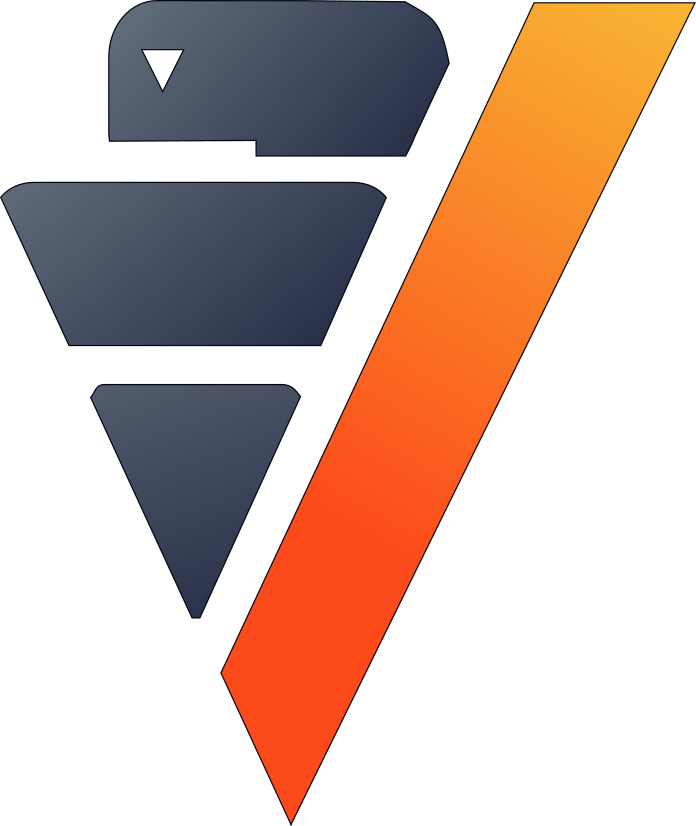

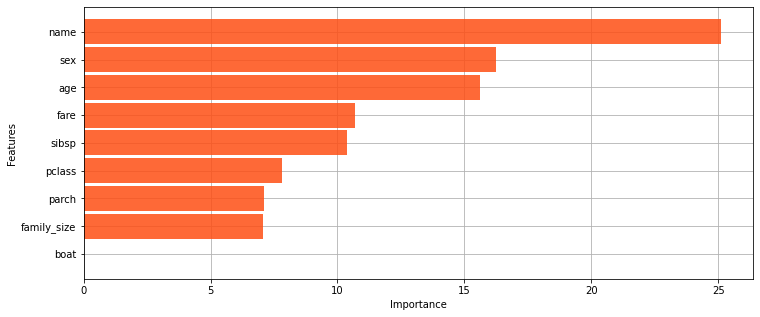

In [35]:
model.features_importance()

As expected, a passenger's title and the sex are the most important predictors of survival.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!